# Empalme con la clase anterior.

Veamos otra figura que expliqe esto.

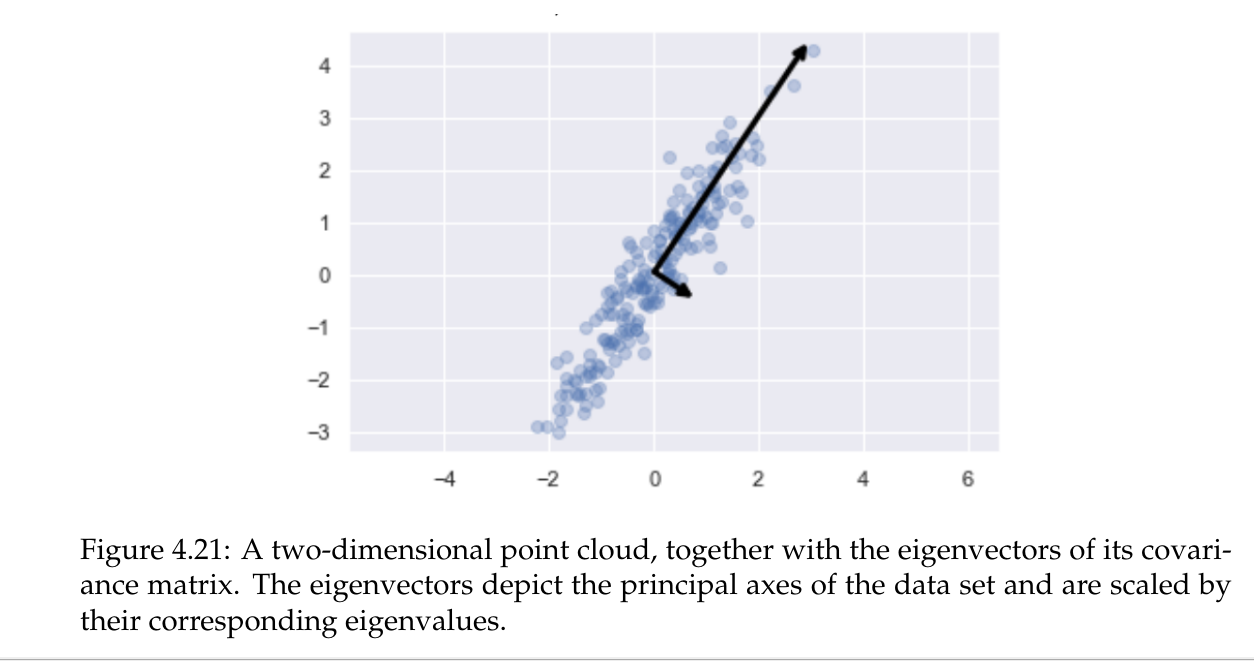

El vector mas grande es la direccion principal y tiene la direccion de $u_1$ (el autovector correspondiete a $\lambda_1$ que mide la dispersion de los puntos.

...y el vector mas pequenho que?
Vamos a encontrar el radio de Rayleigh cuando **excluimos** la direccion principal.

$$R(A, u) = \max_{\| u \|=1, u \perp u_1} = \lambda_2 $$

En general podemos seguir en esa linea para $\mathbb{R}^n$.

Esto nos genera los autovalores. Ver
[Courant minimax principle](https://en.wikipedia.org/wiki/Courant_minimax_principle).

Recuerden el SVD: Signular Value Decomposition.
Como se encuentra el SVD de la matriz $X$?

* Recuerden, se calcula $X^T X$
* Se hallan los autovalores/vectores de $X^T X$.
La raiz cuadrada de estos autovalores son los valores singulares del SVD.


## Reduccion de Dimensionalidad con SVD:
Tenemos la matriz $X=U \Lambda V^T $
entonces

La matriz de covarianza es:
$$X^T X = (V \Lambda^T U^T)(U \Lambda V^T) = V \Lambda^2 V^T$$
donde $\Lambda^2 = \Lambda^T \Lambda$ es la matriz de
autovalores de $X^T X$.

Una vez la matriz $V$ se conoce , se conocen las direcciones principales de la matriz de covarianza $\Sigma = X^T X$.

Donde esta la compresion? Se define un umbral bajo el cual se eliminan todas las dimensiones donde
$\lambda_i < umbral$. La maxima dimension por encima de ese umbral la llamamos $k$. Entonces en vez de considerar $V$ como la matriz completa definimos a una matriz truncada

$$W = [ V_1 | V_2 | \cdots | V_k ] $$

Sobre esta matriz vamos a proyectar nuestros datos


$$z_{ji} = \langle x_j, v_i \rangle , j=1,2, \cdots, m \quad , i=1, 2, \cdots, k $$
Se supone que $k \ll n$

Matricialmente tenemos

$$ Z = XW \tag{1} $$.



El paso anterior esta **proyectando** los datos $X$ al espacio reducido de dimension $k$ generado por la matriz reducida de $k$ columnas $W$.


El paso siguiente es **descomprimir**, entonces
tomemos la ecuacion (1) multipliquemos a derecha for $W^T$ que queda?

$$Z W^T = X W W^T $$
Si $W=V$ (es decir, si no se trunca nada, $W$ tiene $n$ columnas, no $k$. Entonces $W W^T=I$, y
$$Z W^T = X$$
Esto no es gracia por que queremos que $W$ sea mucho menor en dimension que $V$.

Analisis dimensional:

* $X$ dimension $m \times n$ (datos originales)
* $W$ dimensiones $n \times k$, con $k \ll n$
* $Z=XW$ tiene dimensiones $m \times k$. Aca ven
la ganacia es que $z$ tine $k$ columnas y $X$ tiene $n$ columnas con $n \gg k$. Ahora si $\sigma_i$, $i>k$ son muy pequenhos entonces las columnas de $k$ para arriba no **pesan**. La perdida es poca.

Recuerden que la recuperacion es

$$X_{rec} = Z W^T $$.
Las dimensiones del vector $X_{\text{rec}}$ son
$m \times k$, con $k \ll n$.

Ya con esto  tenemos algoritmo que escribimos aca.

* **Parte I** (compresion):
    * Tome todos los vectores de entrada (datos) $x_i$ y construya la matriz $X$ con estos como filas.
    * Calcule el SVD de la matriz $X=U \Lambda V^T $.
    * Estudie los autovectores de $X^T X$ que son los $\sigma_i^2$. Defina un umbral (threshold, en 5 minutos hablamos detalles de esta parte.) Asuma que $k$ es el numero (natural) a partir del cual $\sigma_k < umbral$.
    * Construya la matriz $W$ truncada:
    $$W = [ V_1 | V_2 \cdots | V_k ]   $$
    * **Proyecte** la matriz de datos $X$ al espacio truncado $W$, esto se hace con la operacion
    $$ Z = X W $$
* **Parte II** (descompresion):
    * Backproject: (proyeccion hacia atras)
    $$X_{rec} = Z W^T $$
    


## Como se escoje el umbral para reducir dimensiones.
Es decir, el umbral que  me determina que el espacio reducido tiene $k$ componentes principales.

* Usted podria decir, sin un analisis profundo que yo quiero suprimir todas estas componentes (vectores) tales que la energia ($\sigma_i^2$) es el 10% o menos que la del primer valor singular (cuadrado) $\sigma_1^2$.

Pero hay criterios mas serios. Veamos los

Definamos la terminologia para esto:
* **Average squared projection error**:
Podemos medir el error de aproximacion. Por ejemplo
si $x^{(i)}_{\text{approx}}$ es la muestra aproximada
correspondiente a la muestra exacta $x^{(i)}$, en este sentido definimos a esta expresion (error de proyeccion quadrado promedio) como

$$\epsilon= \frac1m  \sum_{i=1}^m \| x^{(i)} - x_{\text{approx}}^{(i)} \|^2  $$
Podemos entonces usar una tolerancia $\text{tol}$ para determinar el umbral. Si el error $\epsilon$ esta debajo de esta tolerancia se suprimen las dimensiones de ahi en adelante.

* Porcentade del error de proyeccion cuadrada media
con respecto a la variacion total. (percentage of average squared projection with respect to the total variation)

Definimos la **variacion total** como

$$\text{Tot}_{\text{var}} = \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 $$
Asumimos que la media es 0, sino entonces normalizamos restando la media. $\mu=\frac1m \sum_{i=1}^m x^{(i)} = 0$.

Definimos el cumpral de acuerdo a esta fraccion:
Si yo defino como el 1% en este radio,

$$\frac{\epsilon}{\text{Tot}_{\text{var}}} =
\frac{\frac1m \sum_{i=1}^m \| x^{(i)} - x_{\text{approx}} \|^2}{{\frac1m} \sum_{i=1}^m \| x^{(i)} \|^2} < 0.01 \tag{2} $$
Seria el 1% de esta relacion

* **Relative accumulated sum of singular values**:
La suma acumulada y relativa de valores singulares.

$$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^m \sigma_i^2} \tag{3} $$

Existe una relacion entre las ecuaciones (2) y (3), que vamos a explorar.





A lo largo de la direccion $v_i$ la dispersion (energia) esta dada por $v_i^T X^T X v_i= \sigma_i^2$. La dispersion total es la suma de todos estos

$$\sum_{i=1}^m \| x^{(i)} \|^2  = \sum_{i=1}^n \sigma_i^2$$

El error total (cuadrado) acumulado entre la las muestras proyectadas se da por la eliminacion de las componentes $k+1, k+2, \cdots, n$. Este error se puede escrbir en forma matricial como $E=X- X_{\text{approx}}$
debdi a que truncamos las componentes $\sigma_i$, $i=k+1, k+2, \cdots, n$. La matriz error queda como


  \begin{eqnarray*}
      \begin{pmatrix}
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
        \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \ddots & 0 & \ddots & \vdots & \vdots & \vdots & \vdots  \\
        \vdots & \cdots & 0  & \sigma_{k+1} & 0 & \cdots & \cdots & \vdots \\
        \vdots & \cdots & \cdots & 0 & \sigma_{k+2} &  0 & \cdots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
        \vdots & \ddots & \ddots & \ddots & \ddots & 0 & \sigma_{n-1} & 0 \\
        0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \sigma_n
      \end{pmatrix} .
    \end{eqnarray*}




Si tomamos la norma de Frobenious de la matriz $E$

$$\sum_{i=1}^m \| x^{(i)} - x_{\text{approx}} \|^2 = \sum_{i=k+1}^{n} \sigma_i^2 $$

Entonces

$$\sum_{i=1}^m \| x^{(i)} - x_{\text{approx}}^{(i)} \|^2 = \sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2 $$


De esta forma

$$ \frac{\frac1m \sum_{i=1}^m \| x^{(i)} - x_{\text{approx}} \|^2}{{\frac1m} \sum_{i=1}^m \| x^{(i)} \|^2}
= \frac{\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i} = 1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} $$



Decir que

$$  \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}  \ge 0.99$$
Es lo mismo que decir que
$$ 1 -   \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}   \le 0.01  $$

In [1]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
print(A)

np.linalg.svd(A)

[[1 2]
 [3 4]]


SVDResult(U=array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]]), S=array([5.4649857 , 0.36596619]), Vh=array([[-0.57604844, -0.81741556],
       [ 0.81741556, -0.57604844]]))

## Aplicaciones de PCA.

* Compresion de datos para agilizar procesos (transmision de datos) o ahorrar disco o memoria.

* Visualizacion: Datos en 13 dimensiones no son faciles de interpretar. Bajar a dos dimensiones ayuda mucho.
En DL estoy ensenhando "word embedding".

* Reducir datos para agilizar el ML supervisado.

La ultima parte del curso tiene dos secciones:

* Anomaly detection (Deteccion de anomalias)
* Recommender systems (sistemas de recomendacion).

# Deteccion de anomalias: Anomaly detection.
Tambien se le llama **outlier detection** (deteccion de muestras "raras").

## Aplicaciones:
* Fraude. Fraude bancario, tarjetas de credito, seguros.
* Defectos de fabrica (manufactura). Danhos industriales.
* Monitoreo de sistemas de salud, diagnosticos medicos.
* Prevencion de crimen. Vigilancia con videos. Deteccion de intrusos.

Existen varios metodos para la deteccion de anomalias:

* Estadistico (el que veremos en esta clase)
* Proximity-based (basados en proximidad)
* Density-based (basados en densidad)
* clustering-based techniques.

### Metodo estadistico para la deteccion de anomalias.
* El caso de una sola variable (one-dimensional)
* El caso de multidimensional normal distribution.

Por ahora solo estudiamos el caso de la distribucion normal en una sola variable.

La distribucion normal en una sola variable, tambien se conoce como Gaussiana sobre $x$ esta dada por

$$p(x; \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{- \frac{(x - \mu)^2}{2 \sigma^2}} $$

Donde $\mu, \sigma \in \mathbb{R}$,

$$ \mu= \frac1m \sum_{i=1}^m x^{(i)} $$
es la media (mean) y
$$\sigma^2 = \frac1m \sum_{i=1}^m (x^{(i)} - \mu)^2 $$
es la varianza de los datos (ojo que para que no haya sesgo en la varianza se debe dividir por $m-1$ pero eso aca no nos afecta.
Aca $p$ es probabilidad.

$$p( a \le x \le b ) = \int_a^b p(x; \mu, \sigma^2) dx $$

### Interpretacion. Ver grafica.



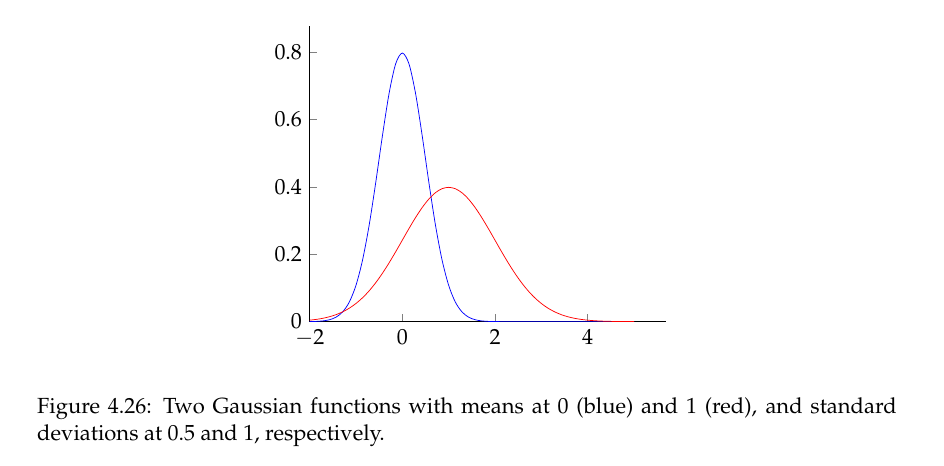